In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import csv
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, Input, Concatenate, Lambda, experimental
from tensorflow.keras.optimizers import SGD
from keras import backend as K
from tensorflow import keras
from PIL import Image, ImageOps, ImageDraw
import os, glob
import numpy as np
import pandas as pd
import sklearn
import math
import random
import matplotlib.pyplot as plt



In [30]:
train_path = "D:/Tese/Projeto BALCAT/Imagens/NIST CARTS/NIST Cartridges"

labels = os.listdir(train_path)

df = pd.DataFrame([], columns=['path', 'label'])
df.head()

for i in labels: 
    class_path = train_path + "/" + i
    carts = os.listdir(class_path)
    for cart in carts:
        df_l = pd.DataFrame({"path": [class_path + "/" + cart], "label": [i]})
        df = df.append(df_l, ignore_index=True)

df = pd.concat([df[:1], df[1:].sample(frac=1)]).reset_index(drop=True)
  


In [54]:
size = (30,30)
input = (30,30,1)
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2
    )



    train_images = train_generator.flow_from_dataframe(
        dataframe=df,
        x_col='path',
        y_col='label',
        target_size=size,
        color_mode='grayscale',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        # rotation_range=30, # Uncomment to use data augmentation
        # zoom_range=0.15,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # shear_range=0.15,
        # horizontal_flip=True,
        # fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=df,
        x_col='path',
        y_col='label',
        target_size=size,
        color_mode='grayscale',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation'
        # rotation_range=30, # Uncomment to use data augmentation
        # zoom_range=0.15,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # shear_range=0.15,
        # horizontal_flip=True,
        # fill_mode="nearest"
    )

    # test_images = test_generator.flow_from_dataframe(
    #     dataframe=test_df,
    #     x_col='Filepath',
    #     y_col='Label',
    #     target_size=(224, 224),
    #     color_mode='rgb',
    #     class_mode='categorical',
    #     batch_size=32,
    #     shuffle=False
    # )
    
    return train_generator,train_images,val_images

In [55]:
train_generator,train_images,val_image = create_gen()

Found 1276 validated image filenames belonging to 5 classes.
Found 319 validated image filenames belonging to 5 classes.


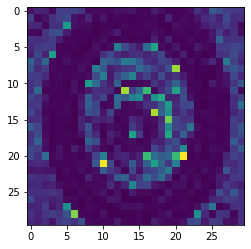

In [56]:
plt.imshow(np.array(val_image[0][0][0]))

In [57]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(36, (3, 3), activation='relu', input_shape=input))
    model.add(MaxPool2D(3, 3))
    model.add(Conv2D(36, (3, 3), activation='relu'))
    model.add(MaxPool2D(3, 3))
    model.add(Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dense(5, activation="softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer= "Adam", metrics=["accuracy"])

    return model


In [58]:
cnn = create_model()
cnn.fit(train_images, validation_data=val_image, epochs = 10, verbose = 1)

Epoch 1/10
40/40 [==============================] - 74s 2s/step - loss: 1.5918 - accuracy: 0.2586 - val_loss: 1.5726 - val_accuracy: 0.2759
Epoch 2/10
40/40 [==============================] - 73s 2s/step - loss: 1.5553 - accuracy: 0.2923 - val_loss: 1.5278 - val_accuracy: 0.3166
Epoch 3/10
40/40 [==============================] - 74s 2s/step - loss: 1.4930 - accuracy: 0.3425 - val_loss: 1.4600 - val_accuracy: 0.3824
Epoch 4/10
40/40 [==============================] - 70s 2s/step - loss: 1.3910 - accuracy: 0.4020 - val_loss: 1.3911 - val_accuracy: 0.4075
Epoch 5/10
40/40 [==============================] - 74s 2s/step - loss: 1.3014 - accuracy: 0.4553 - val_loss: 1.3048 - val_accuracy: 0.4545
Epoch 6/10
40/40 [==============================] - 72s 2s/step - loss: 1.1921 - accuracy: 0.5071 - val_loss: 1.2218 - val_accuracy: 0.5204
Epoch 7/10
40/40 [==============================] - 75s 2s/step - loss: 1.0859 - accuracy: 0.5697 - val_loss: 1.1246 - val_accuracy: 0.5423
Epoch 8/10
40/40 [==

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]
